# 1. Understanding Problem

Understainding what are the variables to know how to solve questions to solve all the problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,3,Lvl,3,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,3,Lvl,3,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,3,Lvl,3,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,3,Lvl,3,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,3,Lvl,3,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


En el problema en Kaggle contiene un archivo data_description.txt donde explican a qué se refiere cada vivienda y, de la misma manera las dividen en grupos, lo cual podría significar que podrían tener relación directa entre sí para entender el precio de una casa en particular.

Debido a que hay palabras técnicas o que no conozco, haré una lista de las traducciones para entender estos grupos.
Esto me sirve para entender aún más las variables incluso antes de escribir código para resolver el problema.

Estas traducciones están en el documento **data_description_es.txt**.

In [4]:
from IPython.display import display, HTML

In [5]:
def create_scrolleable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 220px; overflow: auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [6]:
numerical_features = df_train.drop("Id", axis=1).select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrolleable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
categorical_features = df_train.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrolleable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.shape

(1460, 81)

### Otros pasos importantes para hacer un buen análisis y entendiemiento de los datos

**1. Datos nulos y faltantes**

In [9]:
# Columnas que tienen datos vacíos

number_of_missings = df_train.isnull().sum()
number_of_missings = number_of_missings[number_of_missings != 0]
number_of_missings

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**2. Distribución de datos e identificación de outliers**

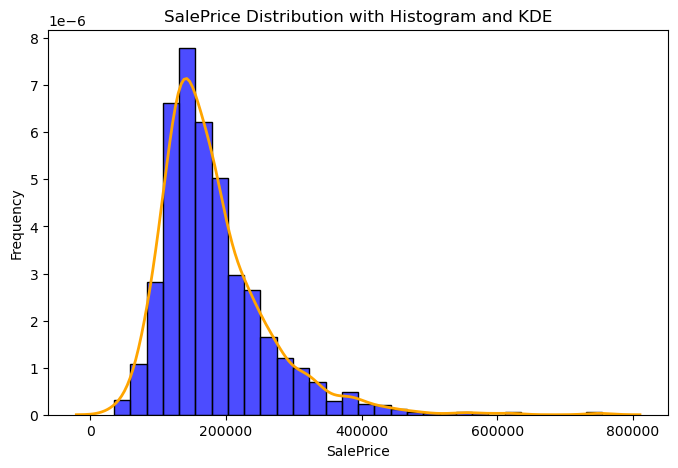

In [10]:
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

data = df_train['SalePrice']

plt.figure(figsize=(8, 5))

sns.kdeplot(data, color="orange", linewidth=2)
sns.histplot(data, bins=30, color='blue', alpha=0.7, stat='density')

plt.title('SalePrice Distribution with Histogram and KDE')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.show()

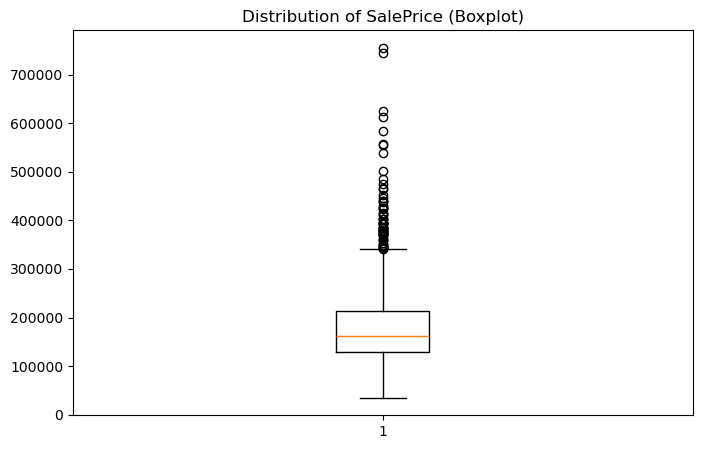

In [11]:
fig = plt.figure(figsize =(8, 5))

plt.boxplot(data)

plt.title('Distribution of SalePrice (Boxplot)')

plt.show()

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

De momento, las conclusiones que se pueden dar son que dado que la desviación de los precios de las casas son más variables conforme el precio aumenta (y no son pocos datos), por lo que debe haber ciertas características específicas de esas casas que hace que el precio aumente.

Por otro lado, para las casas con menor valor, igualmente puede que haya características específicas que haga que el precio sea menor, pero podría ser más probable que haya datos erronéos.

Esas características se identificarán más adelante en el análilsis exploratorio.

**3. Revisión de correlaciones**

Este punto se dejó como último para poder comparar el resto de variables que no son numéricas.

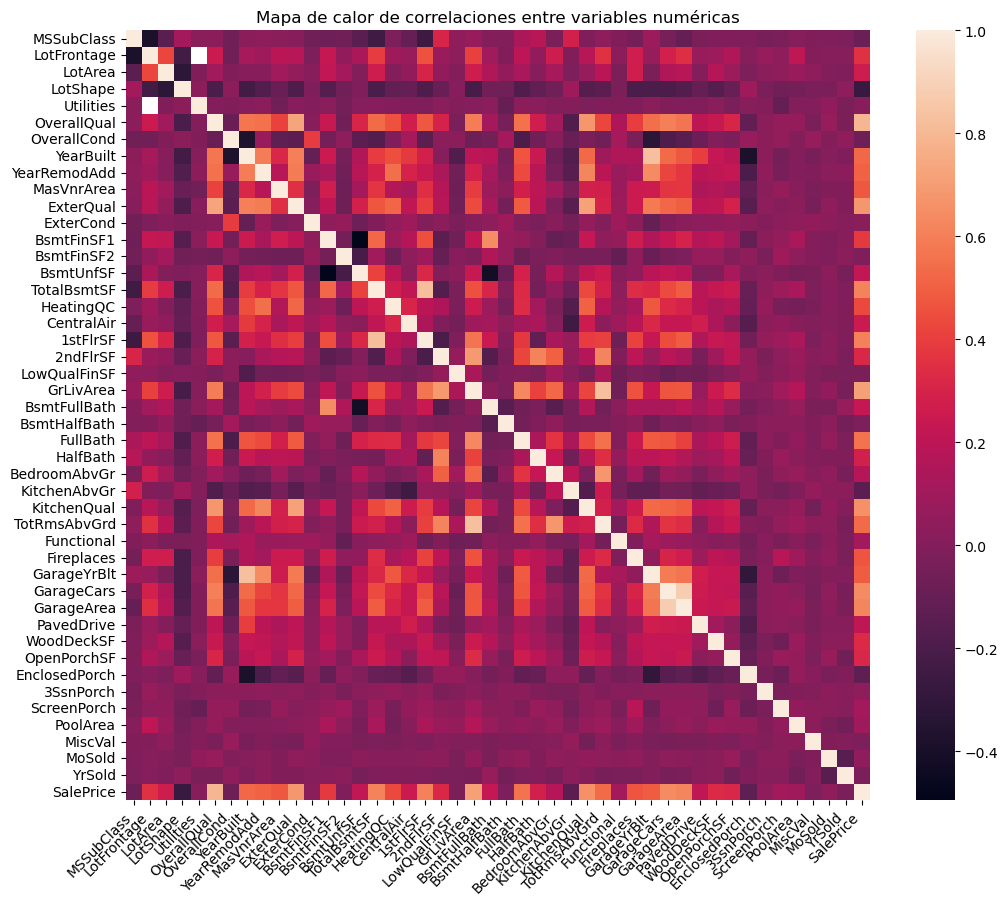

In [39]:
df_num = df_train.drop("Id", axis=1).select_dtypes(include=['number'])

correlation_matrix = df_num.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix)

# Ajustar la rotación de los ejes X e Y
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Mapa de calor de correlaciones entre variables numéricas')

plt.show()

Como primera instancia, veré las correlaciones entre algunas de las varaibles numéricas del dataset. También como consideración importante es saber entender la correlación entendiendo la cantidad de variables.

Haré un filtro de las variables con una correlación mayor o igual a 0.6.

In [40]:
corr_filtered = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1)]

# Convertir la matriz filtrada a un formato largo (long format)
corr_pairs = corr_filtered.stack().reset_index()

corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filtrar las correlaciones que involucran a SalePrice
saleprice_corr = corr_pairs[(corr_pairs['Variable 1'] == 'SalePrice') | (corr_pairs['Variable 2'] == 'SalePrice')]

saleprice_corr_sorted = saleprice_corr.sort_values(by='Correlation', ascending=False)

print(saleprice_corr_sorted[::2])

       Variable 1    Variable 2  Correlation
10    OverallQual     SalePrice     0.790982
102     SalePrice     GrLivArea     0.708624
99      SalePrice     ExterQual     0.682639
104     SalePrice   KitchenQual     0.659600
106     SalePrice    GarageCars     0.640409
107     SalePrice    GarageArea     0.623431
100     SalePrice   TotalBsmtSF     0.613581
44       1stFlrSF     SalePrice     0.605852
60       FullBath     SalePrice     0.560664
77   TotRmsAbvGrd     SalePrice     0.533723
97      SalePrice     YearBuilt     0.522897
98      SalePrice  YearRemodAdd     0.507101


In [41]:
#Correlaciones negativas

corr_filtered = correlation_matrix[correlation_matrix < -0.02]

# Convertir la matriz filtrada a un formato largo (long format)
corr_pairs = corr_filtered.stack().reset_index()

corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filtrar las correlaciones que involucran a SalePrice
saleprice_corr = corr_pairs[(corr_pairs['Variable 1'] == 'SalePrice') | (corr_pairs['Variable 2'] == 'SalePrice')]

saleprice_corr_sorted = saleprice_corr.sort_values(by='Correlation', ascending=False)

print("Variables con correlación negativa\n")
print(saleprice_corr_sorted[::2])

Variables con correlación negativa

        Variable 1 Variable 2  Correlation
497        MiscVal  SalePrice    -0.021190
248   LowQualFinSF  SalePrice    -0.025606
521         YrSold  SalePrice    -0.028923
100    OverallCond  SalePrice    -0.077856
18      MSSubClass  SalePrice    -0.084284
455  EnclosedPorch  SalePrice    -0.128578
340   KitchenAbvGr  SalePrice    -0.135907
61        LotShape  SalePrice    -0.267759


De momento, las correlaciones más importantes son aquellas que tienen una mayor correlación con la variable de **SalePrice**, por lo que se hará un análisis más profundo a esas variables.

1. **OverallQual**: Calidad general del material y acabado
2. **GrLivArea**: Área habitable por encima del nivel del suelo en pies cuadrados
3. **GarageCars**: Capacidad del garaje en número de autos
4. **GarageArea**: Tamaño del garaje en pies cuadrados
5. **TotalBsmtSF**: Total de pies cuadrados del área del sótano
6. **1stFlrSF**: Pies cuadrados del primer piso
7. **FullBath**: Baños completos por encima del nivel del suelo
8. **TotRmsAbvGrd**: Total de habitaciones por encima del nivel del suelo (no incluye baños)
9. **YearBuilt**: Fecha de construcción original
10. **YearRemodAdd**: Fecha de remodelación

#### Correlaciones negativas
1. **MiscVal**: Valor de la característica miscelánea
2. **LowQualFinSF**: Pies cuadrados de calidad inferior terminados (todos los pisos)
3. **YrSold**: Año de venta
4. **OverallCond**: Calificación general de la condición
5. **MSSubClass**: Clase del edificio
6. **EnclosedPorch**: Área del porche cerrado en pies cuadrados

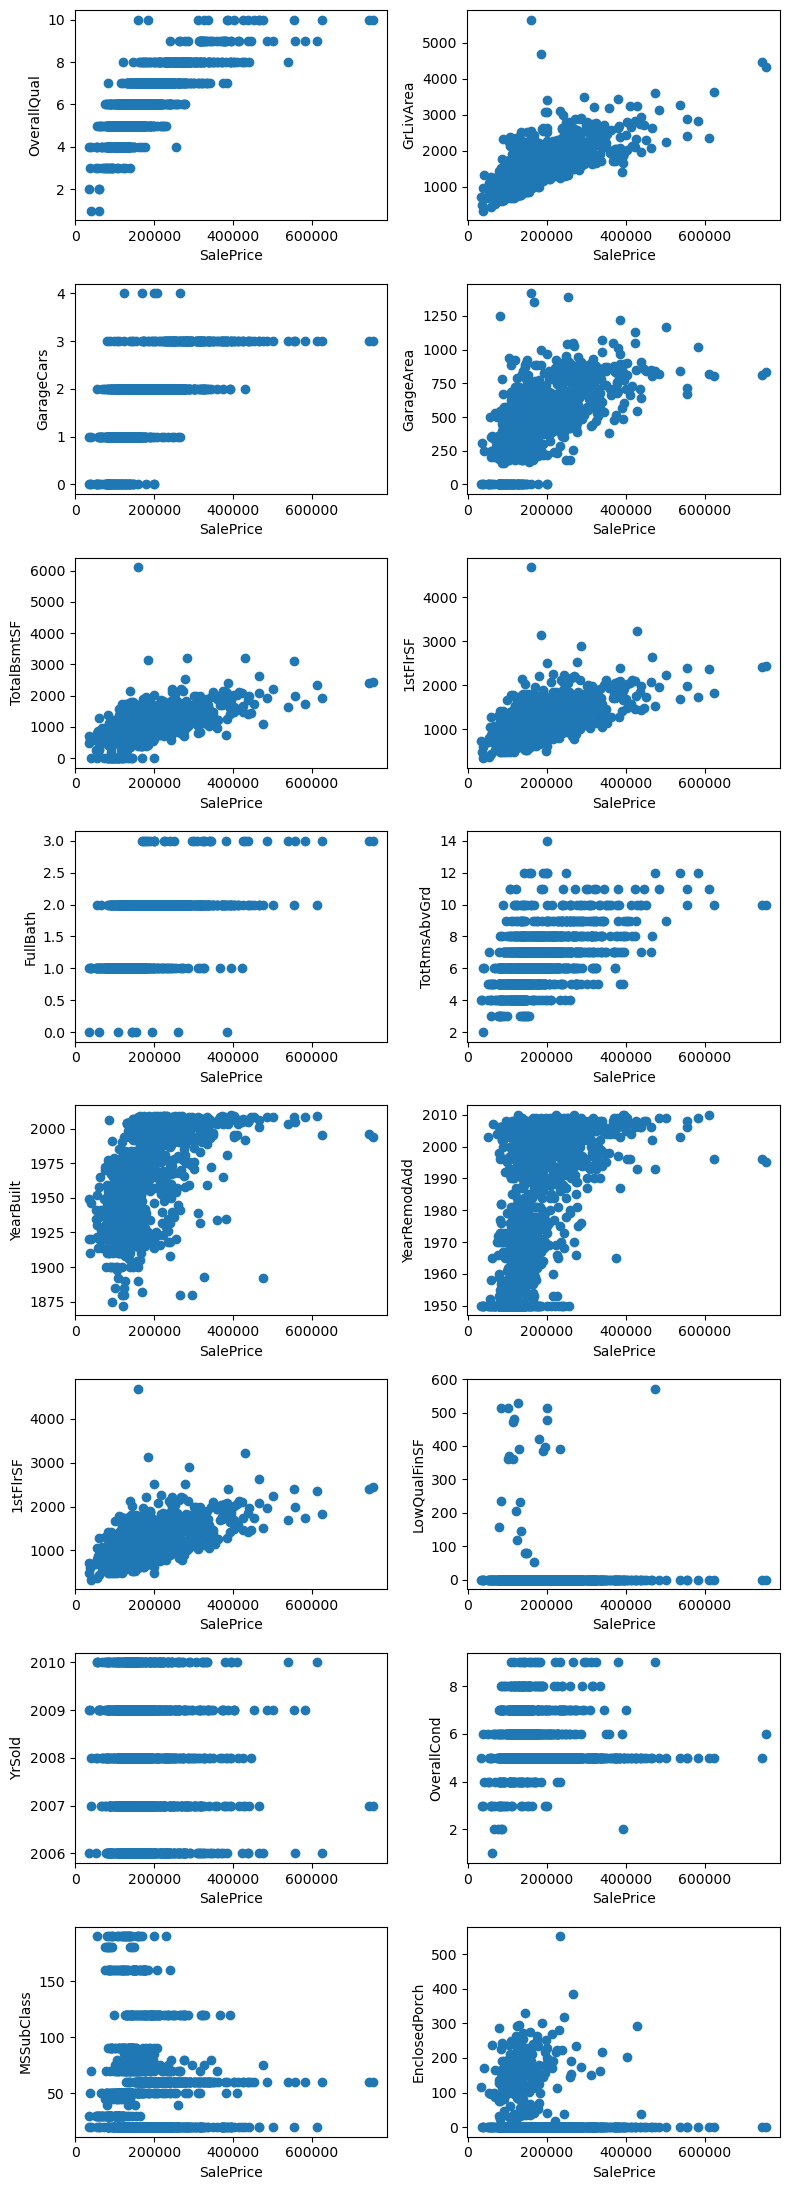

In [16]:
x = df_train['SalePrice']

y1 = df_train['OverallQual']
y2 = df_train['GrLivArea']
y3 = df_train['GarageCars']
y4 = df_train['GarageArea']
y5 = df_train['TotalBsmtSF']
y6 = df_train['1stFlrSF']
y7 = df_train['FullBath']
y8 = df_train['TotRmsAbvGrd']
y9 = df_train['YearBuilt']
y10 = df_train['YearRemodAdd']

y11 = df_train['1stFlrSF']
y12 = df_train['LowQualFinSF']
y13 = df_train['YrSold']
y14 = df_train['OverallCond']
y15 = df_train['MSSubClass']
y16 = df_train['EnclosedPorch']

fig, ax = plt.subplots(8, 2, figsize=(8, 22))

ax = ax.flatten()

ax[0].scatter(x, y1)
ax[0].set_ylabel('OverallQual')
ax[1].scatter(x, y2)
ax[1].set_ylabel('GrLivArea')
ax[2].scatter(x, y3)
ax[2].set_ylabel('GarageCars')
ax[3].scatter(x, y4)
ax[3].set_ylabel('GarageArea')
ax[4].scatter(x, y5)
ax[4].set_ylabel('TotalBsmtSF')
ax[5].scatter(x, y6)
ax[5].set_ylabel('1stFlrSF')
ax[6].scatter(x, y7)
ax[6].set_ylabel('FullBath')
ax[7].scatter(x, y8)
ax[7].set_ylabel('TotRmsAbvGrd')
ax[8].scatter(x, y9)
ax[8].set_ylabel('YearBuilt')
ax[9].scatter(x, y10)
ax[9].set_ylabel('YearRemodAdd')

ax[10].scatter(x, y11)
ax[10].set_ylabel('1stFlrSF')
# Por ver
ax[11].scatter(x, y12)
ax[11].set_ylabel('LowQualFinSF')
# Por ver
ax[12].scatter(x, y13)
ax[12].set_ylabel('YrSold')
ax[13].scatter(x, y14)
ax[13].set_ylabel('OverallCond')
ax[14].scatter(x, y15)
# Por ver
ax[14].set_ylabel('MSSubClass')
ax[15].scatter(x, y16)
ax[15].set_ylabel('EnclosedPorch')

for a in ax:
    a.set_xlabel('SalePrice')

# Evita superposición de las gráficas
plt.tight_layout()
plt.show()

**4. Distribuciones categóricas**

Para poder entender las variables categóricas tanto antes como mintras veo sus distribuciones, gráficas o cualquier cosa, puedo hacer uso del documento de *data_description_es.txt* para entender mejor cada una de las categorias y saber qué tipo de variables son (ordinales o nominales) y decidir qué hacer con cada variable, columna, registro, etc.

In [30]:
number_of_missings

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
display(HTML(html_categorical))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [18]:
for col in df_train.select_dtypes(include=[object]).columns:
    print(df_train[col].value_counts())
    print("\n")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Alley
Grvl    50
Pave    41
Name: count, dtype: int64


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale   

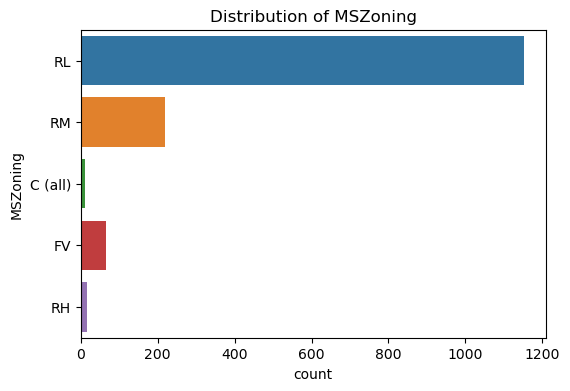

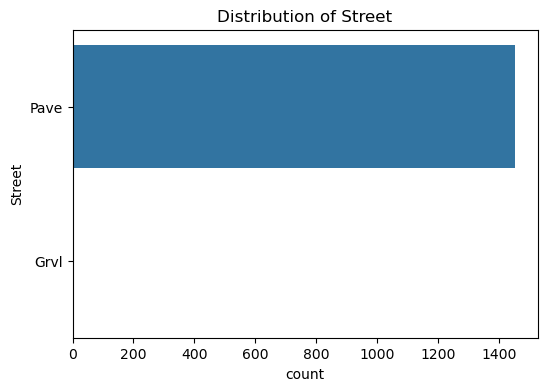

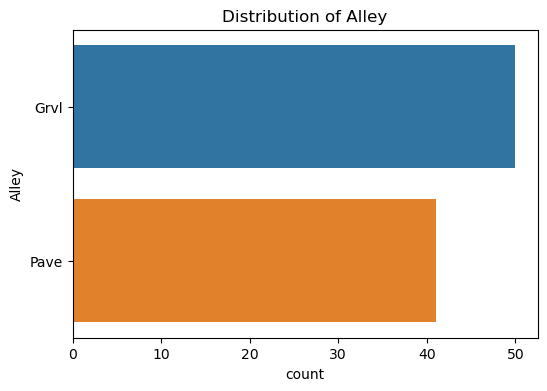

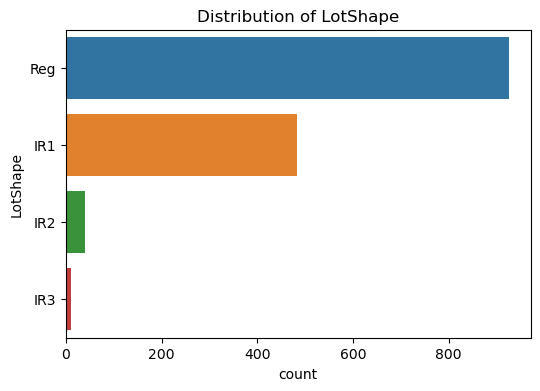

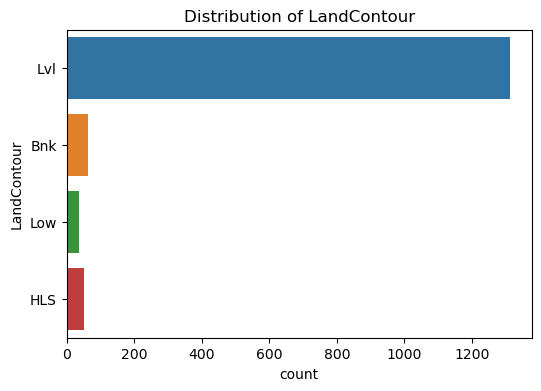

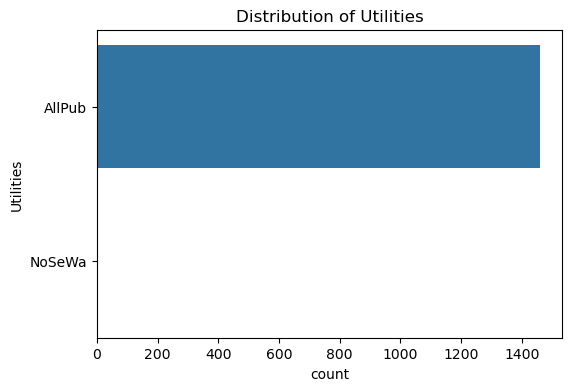

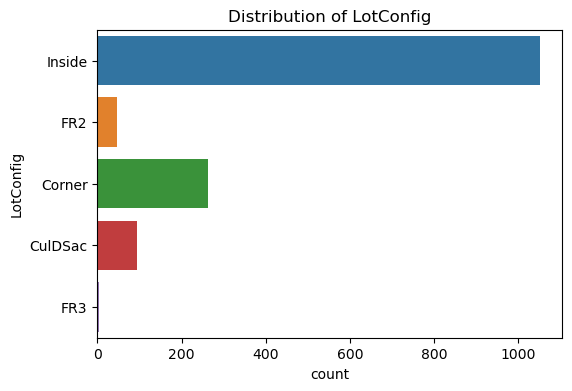

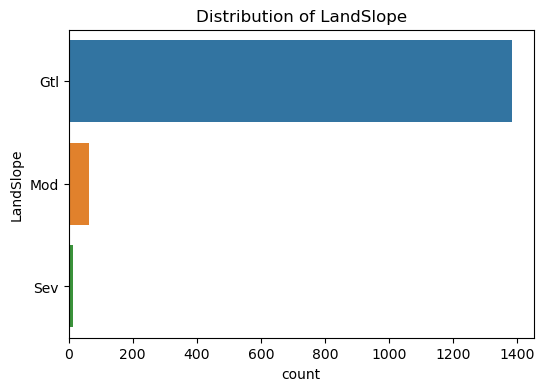

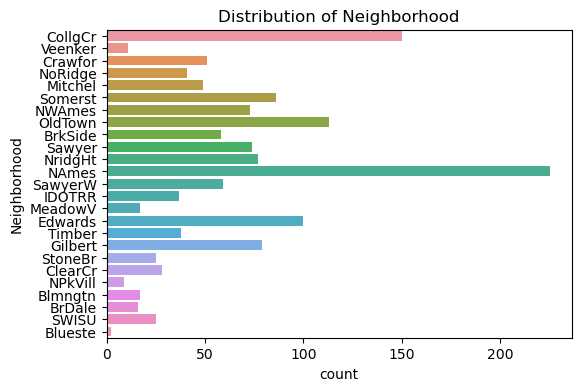

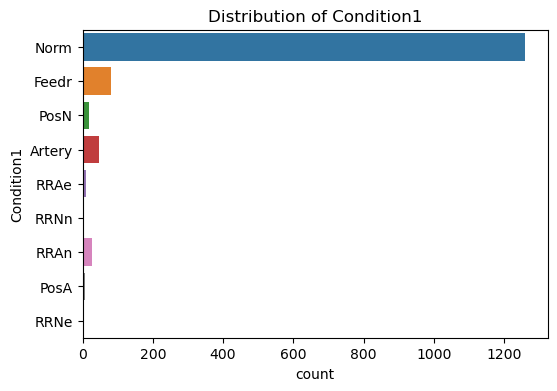

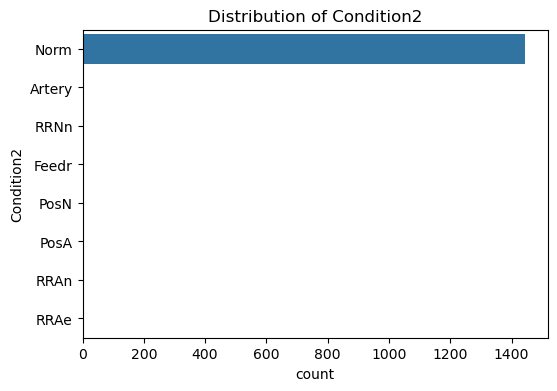

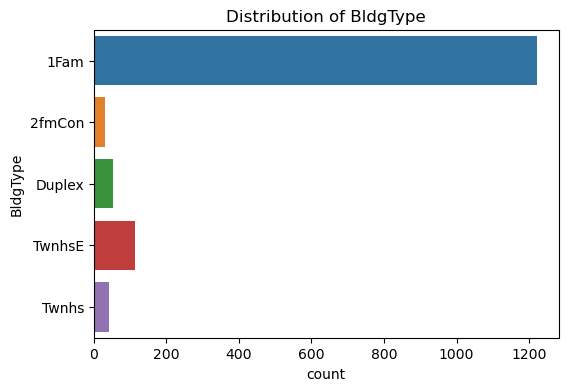

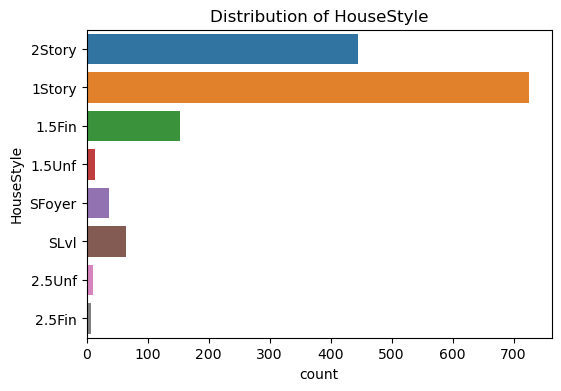

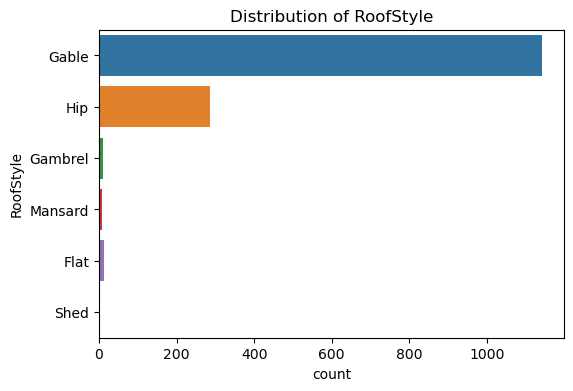

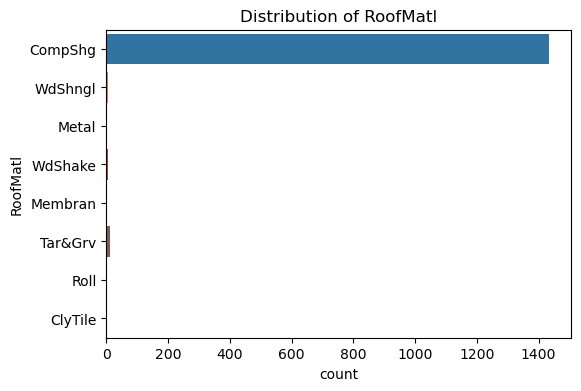

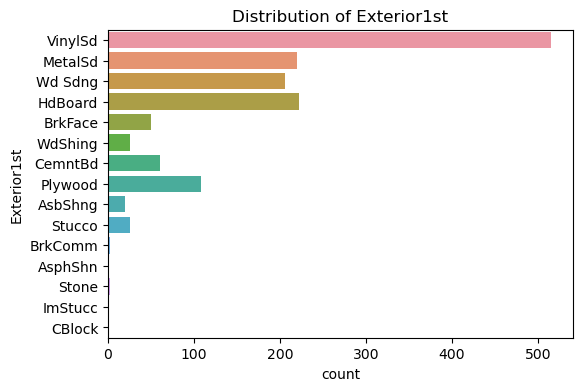

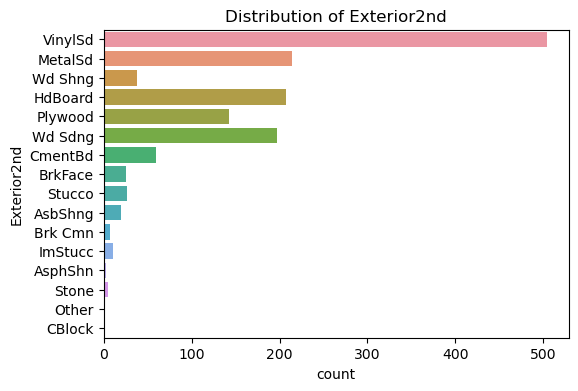

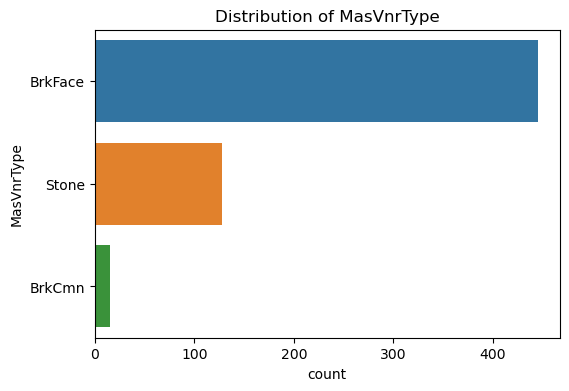

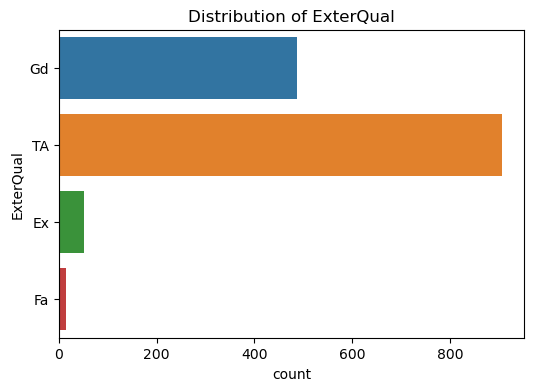

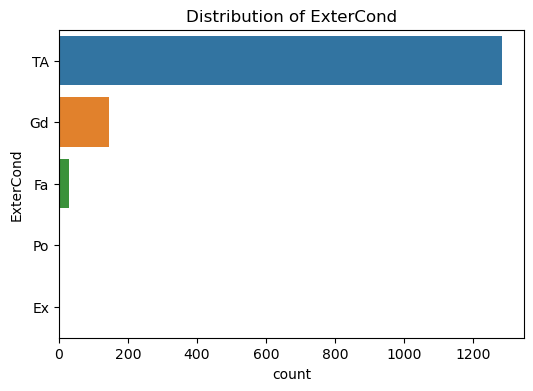

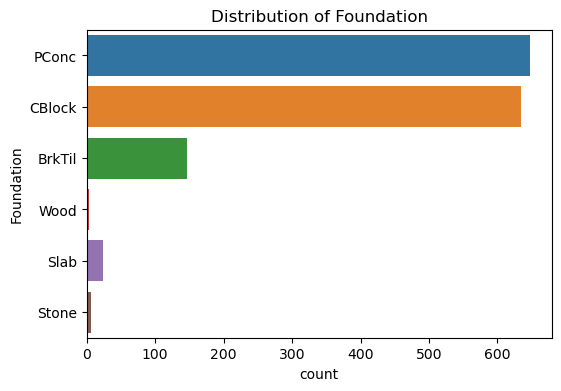

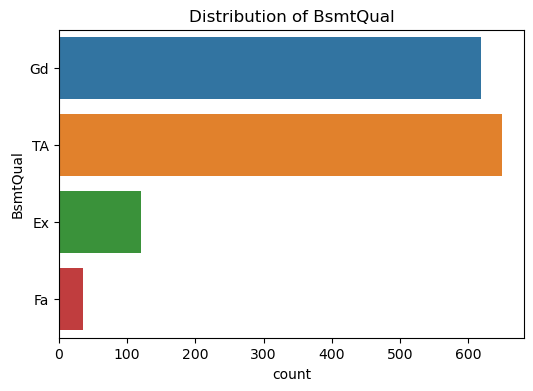

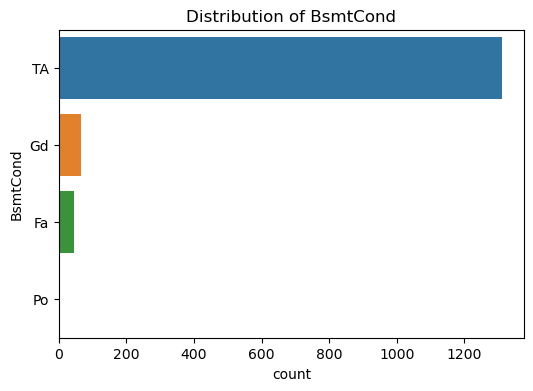

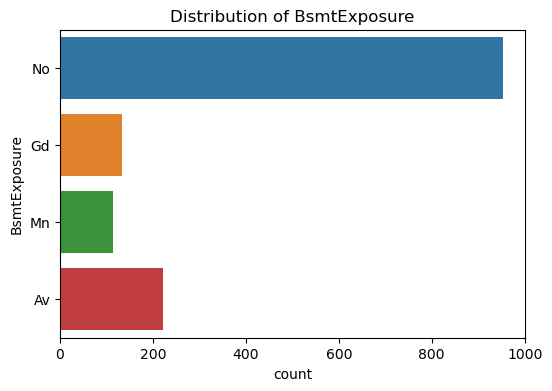

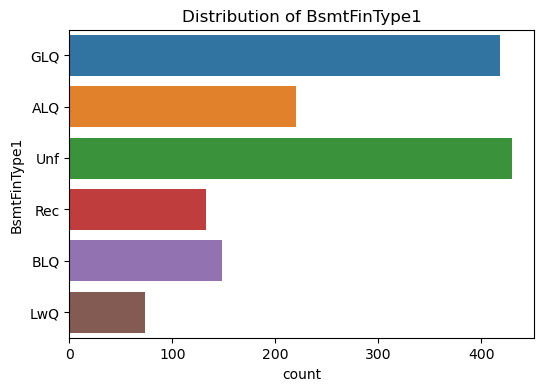

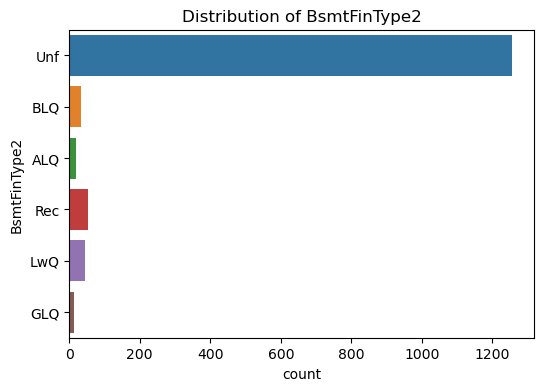

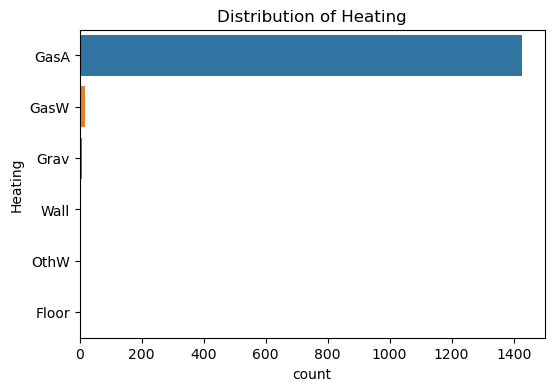

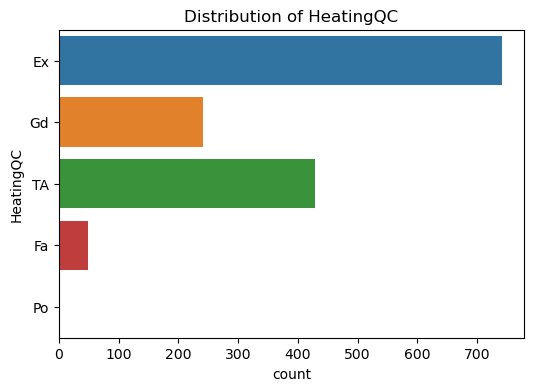

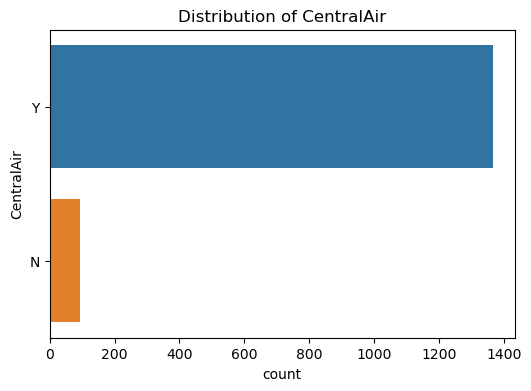

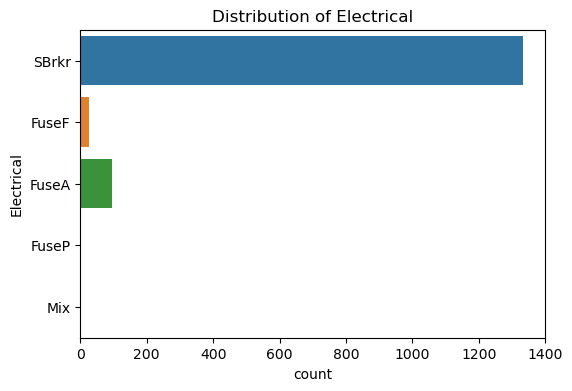

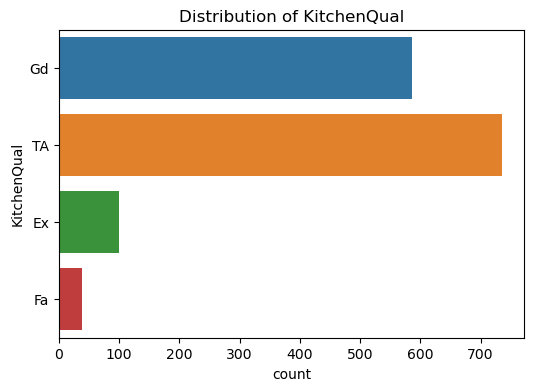

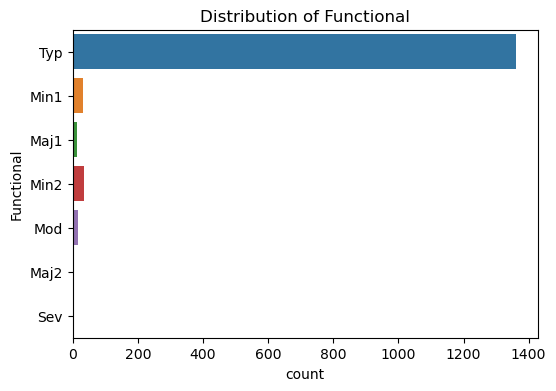

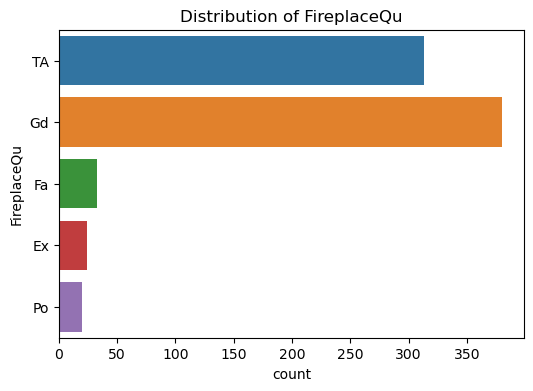

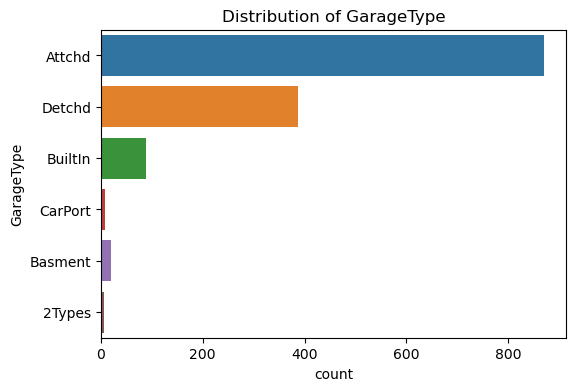

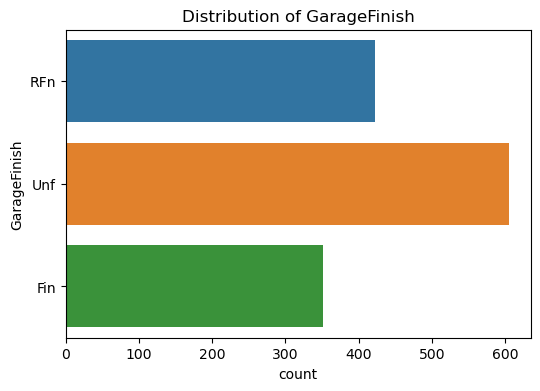

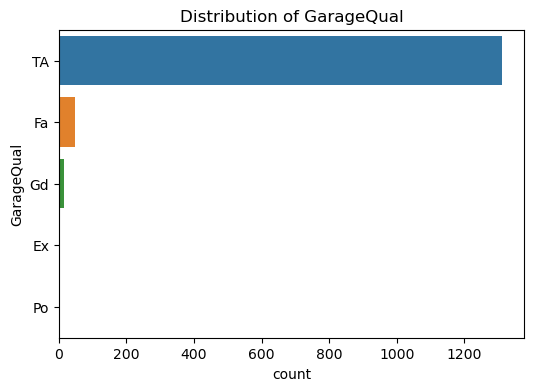

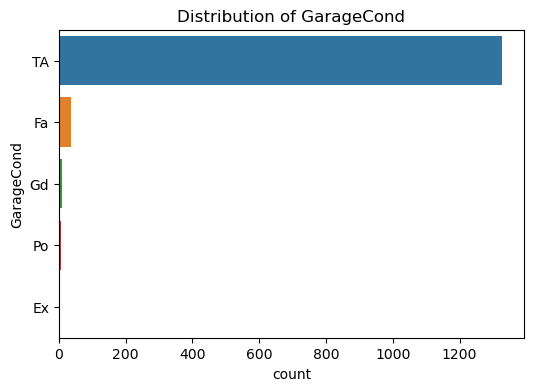

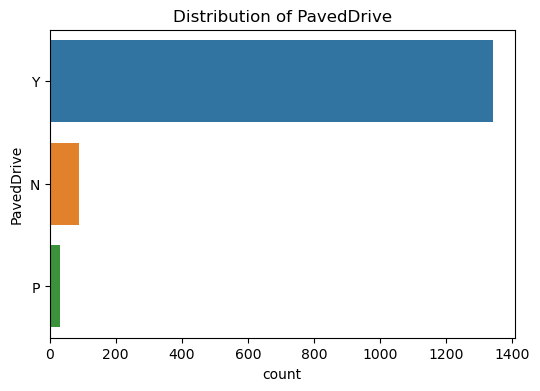

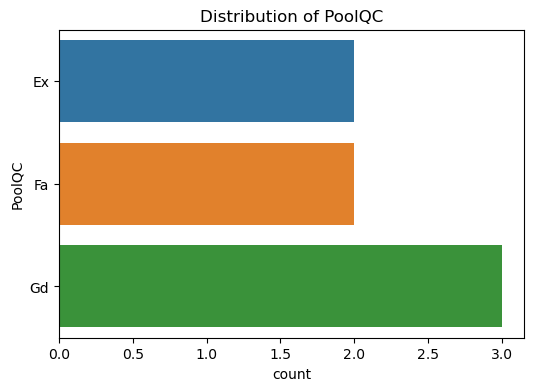

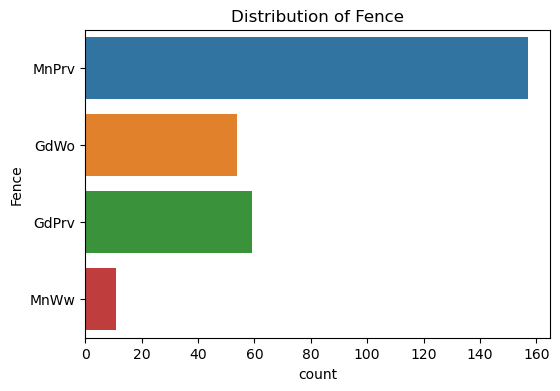

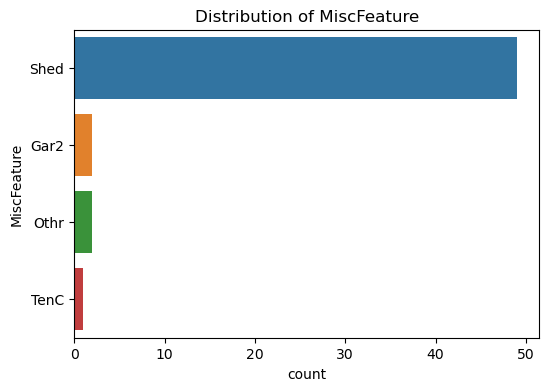

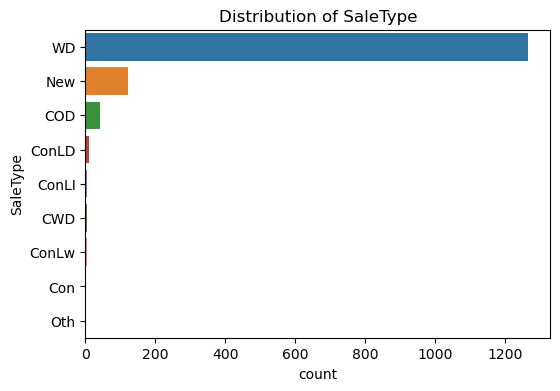

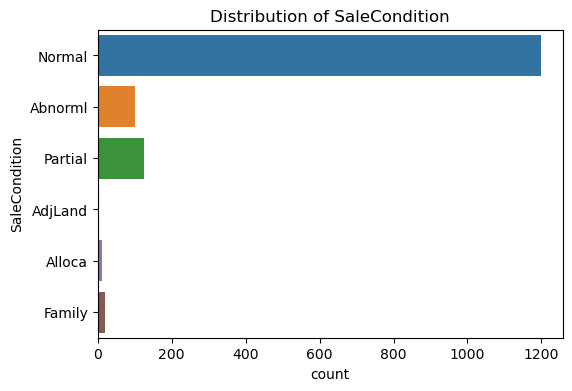

In [19]:
for col in df_train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df_train)
    plt.title(f"Distribution of {col}")
    plt.show()

**5. Transformaciones necesarias (variables con sesgo)**

Para algunas variables, haré agrupaciones en los casos donde en la cantidad de registros hay mucha diferencia.
Pero antes de hacer ese procedimiento, separaré las variables **ordinales** de las **nominales**,e incluso de las **binarias**.

### Nominales

### Binarias

Los valores binarios, se clasificarán de manera negativa/positiva, dando un ejemplo:
- Sí: **1**
- No: **0**

In [32]:
df_train['CentralAir'] = df_train['CentralAir'].map({'N': 0, 'Y': 1}).astype(int)

### Ordinales

Los valores ordinales, se ordenarán de manera ascendente, dando un ejemplo:
- Bueno: **2**
- Medio: **1**
- Malo: **0**

In [20]:
df_train['LotShape'] = df_train['LotShape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}).astype(int)

In [21]:
df_train['Utilities'] = df_train['Utilities'].map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}).astype(int)

In [22]:
df_train['ExterQual'] = df_train['ExterQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}).astype(int)

In [23]:
df_train['ExterCond'] = df_train['ExterCond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}).astype(int)

In [ ]:
# Arrelgar valores vacios y ejecutar
df_train['BsmtQual'] = df_train['BsmtQual'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}).astype(int)

In [ ]:
# Arrelgar valores vacios y ejecutar
df_train['BsmtCond'] = df_train['BsmtCond'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}).astype(int)

In [ ]:
# Arrelgar valores vacios y ejecutar
df_train['BsmtExposure'] = df_train['BsmtExposure'].map({'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

In [ ]:
# Arrelgar valores vacios y ejecutar
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}).astype(int)

In [ ]:
# Arrelgar valores vacios y ejecutar
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].map({'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}).astype(int)

In [31]:
df_train['HeatingQC'] = df_train['HeatingQC'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}).astype(int)

In [33]:
df_train['KitchenQual'] = df_train['KitchenQual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}).astype(int)

In [34]:
df_train['Functional'] = df_train['Functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}).astype(int)

In [ ]:
# Arreglar vacios y ejecutar
df_train['FireplaceQu'] = df_train['FireplaceQu'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}).astype(int)

In [ ]:
# Arreglar vacios y ejecutar
df_train['GarageQual'] = df_train['GarageQual'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}).astype(int)

In [ ]:
# Arreglar vacios y ejecutar
df_train['GarageCond'] = df_train['GarageCond'].map({'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}).astype(int)

In [35]:
df_train['PavedDrive'] = df_train['PavedDrive'].map({'P': 0, 'N': 1, 'Y': 2}).astype(int)

In [ ]:
# Arreglar vacios y ejecutar
df_train['PoolQC'] = df_train['PoolQC'].map({'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}).astype(int)

In [ ]:
# Arreglar vacios y ejecutar
df_train['Fence'] = df_train['Fence'].map({'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

# 2. Exploratory Data Analysis (EDA)

Normalmente, preferiría comenzar con la limpieza de los datos, pero debido a que hay bastantes, lo único que se evitará será la eliminación de registros (más específicamente para las columnas con pocos datos), ya que estos podrían ser importantes para algún tipo de relación en el precio de las casas.

# 3. Preprocesing

# 4. Feature Engineering

# 5. Models

# 6. Model Evaluation

# 7. Optimization